VISUALISATION DES ALGORITHMES DU PLUS COURTS CHEMIN ET DJISKTRAT

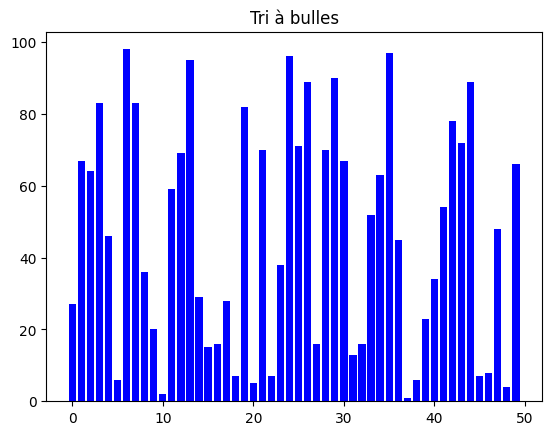

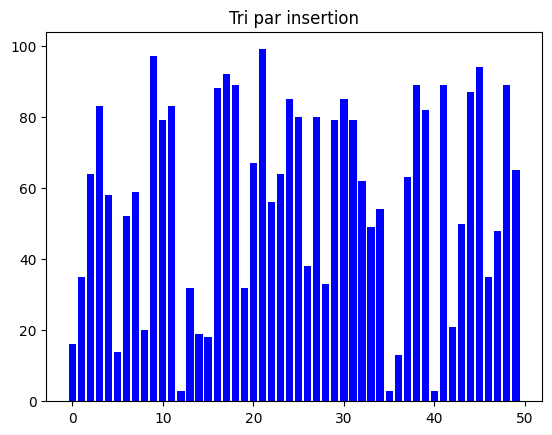

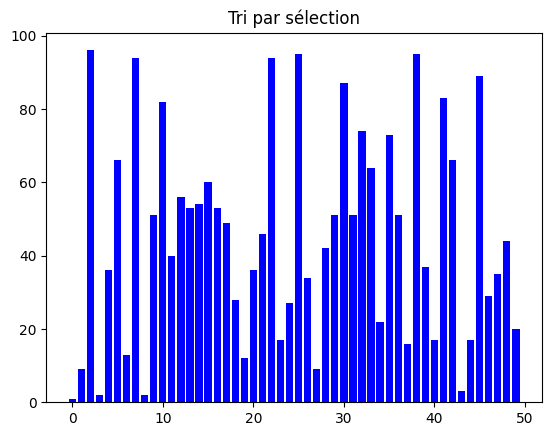

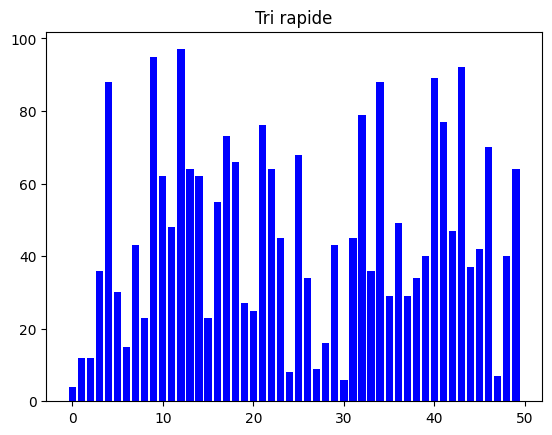

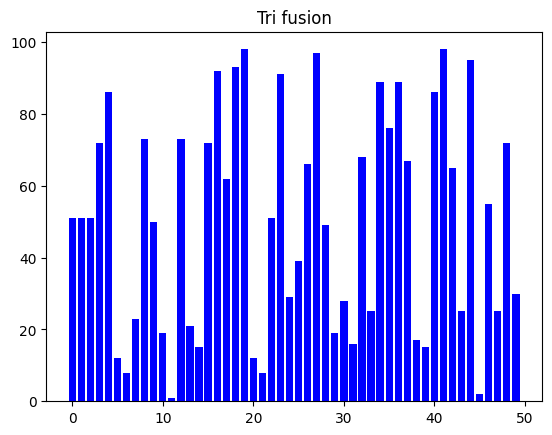

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Implémentation du tri à bulles
def bubble_sort(arr):
    arr = list(arr)
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
            yield arr.copy()

# Implémentation du tri par insertion
def insertion_sort(arr):
    arr = list(arr)
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
            yield arr.copy()
        arr[j + 1] = key
        yield arr.copy()

# Implémentation du tri par sélection
def selection_sort(arr):
    arr = list(arr)
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
        yield arr.copy()

# Implémentation du tri rapide (Quick Sort)
def quick_sort(arr, low=0, high=None, states=None):
    if states is None:
        states = []
        arr = list(arr)
    
    if high is None:
        high = len(arr) - 1
    
    if low < high:
        pivot, states = partition(arr, low, high, states)
        quick_sort(arr, low, pivot - 1, states)
        quick_sort(arr, pivot + 1, high, states)
    
    return states

# Fonction de partition pour le tri rapide
def partition(arr, low, high, states):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
        states.append(arr.copy())
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    states.append(arr.copy())
    return i + 1, states

# Implémentation du tri fusion (Merge Sort)
def merge_sort(arr, states=None):
    if states is None:
        states = []
        arr = list(arr)
    
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]
        
        merge_sort(left_half, states)
        merge_sort(right_half, states)
        
        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1
            states.append(arr.copy())
        
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1
            states.append(arr.copy())
        
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
            states.append(arr.copy())
    return states

# Fonction de visualisation du tri avec matplotlib
def visualize_sorting_algorithm(algorithm, title):
    arr = np.random.randint(1, 100, 50)
    plt.ion()
    fig, ax = plt.subplots()
    ax.set_title(title)
    bars = ax.bar(range(len(arr)), arr, color='blue')
    
    def update_fig(arr):
        for bar, height in zip(bars, arr):
            bar.set_height(height)
        plt.pause(0.01)
    
    states = algorithm(arr)
    for state in states:
        update_fig(state)
    
    plt.ioff()
    plt.show()

# Exécuter tous les tris un par un
def run_all_sorts():
    sorting_algorithms = [
        ('Tri à bulles', bubble_sort),
        ('Tri par insertion', insertion_sort),
        ('Tri par sélection', selection_sort),
        ('Tri rapide', lambda arr: quick_sort(arr)),
        ('Tri fusion', lambda arr: merge_sort(arr))
    ]
    
    for name, algorithm in sorting_algorithms:
        visualize_sorting_algorithm(algorithm, name)
        time.sleep(1)

# Exécution du programme
if __name__ == "__main__":
    run_all_sorts()


DJISKTRAT

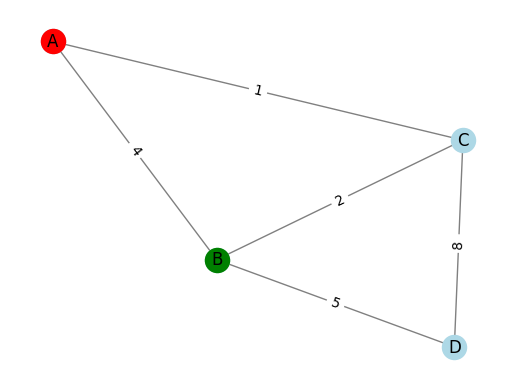

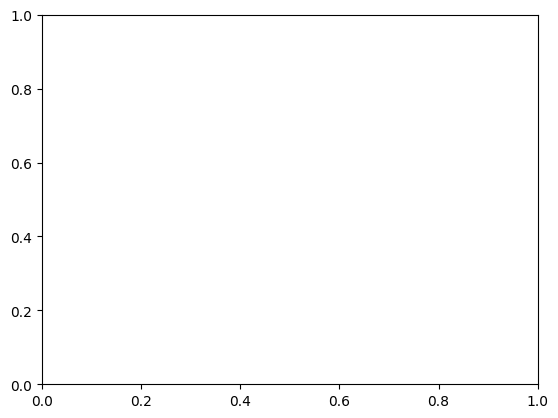

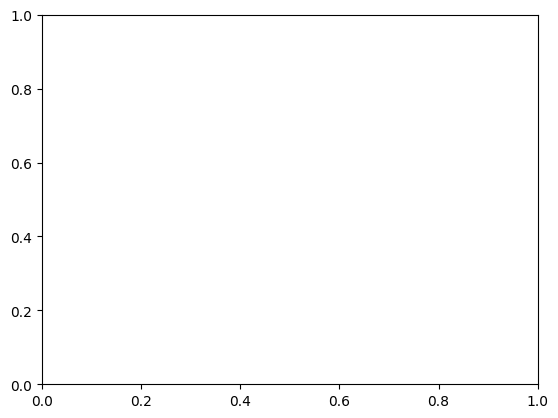

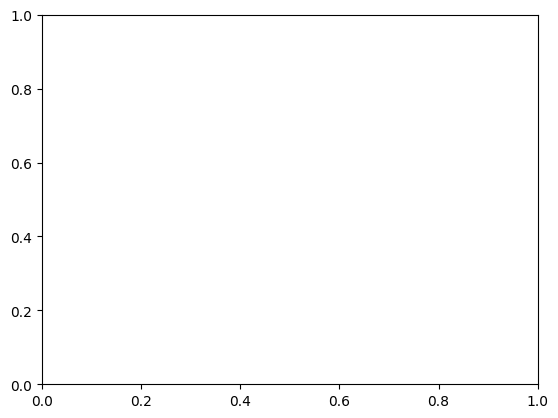

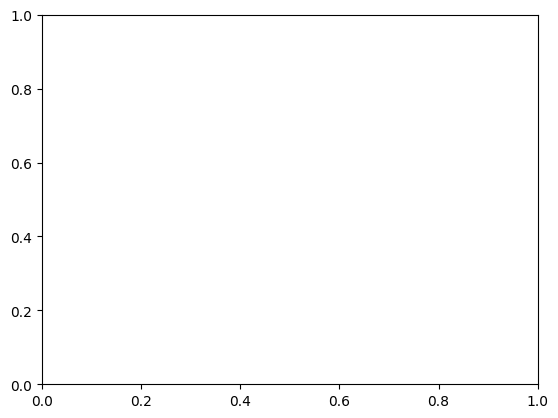

In [2]:
import heapq  # Utilisé pour gérer la file de priorité (min-heap)
import networkx as nx  # Bibliothèque pour la manipulation et la visualisation de graphes
import matplotlib.pyplot as plt  # Utilisé pour afficher le graphe

def dijkstra(graph, start):
    # Initialisation des distances minimales à l'infini pour tous les nœuds sauf le point de départ
    shortest_paths = {node: float('inf') for node in graph}
    shortest_paths[start] = 0  # La distance du point de départ à lui-même est 0
    priority_queue = [(0, start)]  # Min-heap contenant (distance, nœud)
    visited = set()  # Ensemble pour stocker les nœuds déjà visités
    
    while priority_queue:  # Tant que la file de priorité n'est pas vide
        current_distance, current_node = heapq.heappop(priority_queue)  # Récupère le nœud avec la plus petite distance
        
        if current_node in visited:  # Si le nœud a déjà été visité, on passe au suivant
            continue
        visited.add(current_node)  # Marquer le nœud comme visité
        
        for neighbor, weight in graph[current_node].items():  # Parcours des voisins du nœud actuel
            distance = current_distance + weight  # Calcul de la nouvelle distance potentielle
            if distance < shortest_paths[neighbor]:  # Si la nouvelle distance est plus courte que celle enregistrée
                shortest_paths[neighbor] = distance  # Mise à jour de la distance
                heapq.heappush(priority_queue, (distance, neighbor))  # Ajouter le voisin dans la file de priorité
                yield shortest_paths.copy(), current_node, neighbor  # Retourner l'état actuel des chemins courts

def visualize_dijkstra(graph, start):
    G = nx.Graph()  # Création d'un graphe NetworkX
    for node in graph:  # Ajout des arêtes et de leurs poids
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)  # Définition de la position des nœuds pour l'affichage
    plt.ion()  # Active le mode interactif de Matplotlib
    fig, ax = plt.subplots()  # Création de la figure et des axes
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', ax=ax)  # Affichage du graphe initial
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}  # Création des étiquettes de poids des arêtes
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)  # Affichage des poids sur le graphe
    
    for shortest_paths, current_node, neighbor in dijkstra(graph, start):  # Exécution de Dijkstra et visualisation progressive
        plt.cla()  # Efface le graphique précédent
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', ax=ax)  # Redessine le graphe
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)  # Réaffiche les poids des arêtes
        nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='red', ax=ax)  # Colorie le nœud en cours en rouge
        nx.draw_networkx_nodes(G, pos, nodelist=[neighbor], node_color='green', ax=ax)  # Colorie le voisin en vert
        
        plt.pause(0.5)  # Pause pour observer l'évolution du graphe
    
    plt.ioff()  # Désactive le mode interactif
    plt.show()  # Affichage final du graphe

if __name__ == "__main__":
    graph = {
        'A': {'B': 4, 'C': 1},  # Définition du graphe sous forme de dictionnaire
        'B': {'A': 4, 'C': 2, 'D': 5},
        'C': {'A': 1, 'B': 2, 'D': 8},
        'D': {'B': 5, 'C': 8}
    }
    visualize_dijkstra(graph, 'A')  # Lancement de la visualisation en partant du nœud 'A'
